In [80]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [8]:
# File with public supply total GW + SW
usgs_2020 = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\PS_HUC12_GW_2000_2020.csv')
# Machine learning model output for domestic demand per capita
dpc_2020 = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\delivery_water_use_model\predictions\national_dpc_predictions.csv')
# Baseline water treatment train files
wt_baseline = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\2020_wt_baseline_spreadsheet.csv')
# Read state and county shapefiles
us_counties = gp.read_file(r'\Users\mhardika\Documents\AMO\GeoToolAll_Methods\GeoData\US_County_Boundaries\US_CountyBndrys.shp')
us_counties = us_counties.to_crs("EPSG:4326")
us_states = gp.read_file(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files\tl_rd22_us_state\tl_rd22_us_state.shp')
us_states = us_states.to_crs("EPSG:4326")

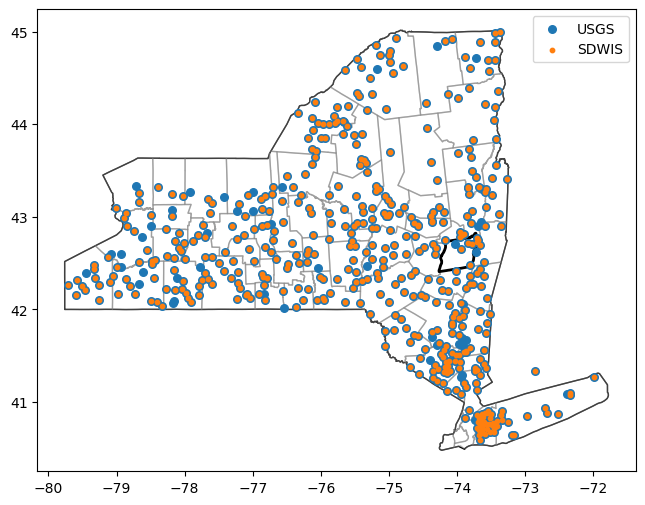

In [113]:
# Checking how many treatment facilities are in a county for the state MA
# Plot the state of MA

state_border = us_states.loc[us_states['STATEFP']=='36']
state_geo = us_counties.loc[us_counties['STATEFP']=='36']

fig, ax = plt.subplots(figsize = (14,6))
state_border.plot(ax=ax,facecolor ='none',edgecolor ='black')
state_geo.plot(ax=ax,facecolor ='none',edgecolor ='gray',alpha = 0.5)

# Get dataset for the state
dpc_2020_no_duplicates = dpc_2020.drop_duplicates('wsa_agidf')
dpc_2020_no_duplicates_state = dpc_2020_no_duplicates.loc[dpc_2020_no_duplicates['wsa_agidf'].str[0:2]=='ny']
# dpc_2020_no_duplicates_state.head(5)
wt_baseline_state = wt_baseline.loc[wt_baseline['PWS ID'].str[0:2]=='NY']
# wt_baseline_state.head(5)

# Plot the facilities in MA listed in the USGS dataset
ax.scatter(dpc_2020_no_duplicates_state['lon'],dpc_2020_no_duplicates_state['lat'],label = 'USGS',s = 30)

# Plot the facilities in MA listed in the filtered SDWIS dataset
ax.scatter(wt_baseline_state['Longitude'],wt_baseline_state['Latitude'],label='SDWIS',s=10)

ax.legend()

In [96]:
wt_baseline_state.loc[20135]['Longitude']

-73.77793271

In [128]:
# Get all facilities in one County
county_polygon = state_geo.loc[state_geo['NAME']=='Albany'].geometry

temp = []

for idx,row in wt_baseline_state.iterrows():
    # print(idx)
    sample_point = Point(wt_baseline_state.loc[idx]['Longitude'],wt_baseline_state.loc[idx]['Latitude'])
    # print(sample_point)
    if county_polygon.values.contains(sample_point):
        temp.append(row)

county_facilities = pd.DataFrame(temp)

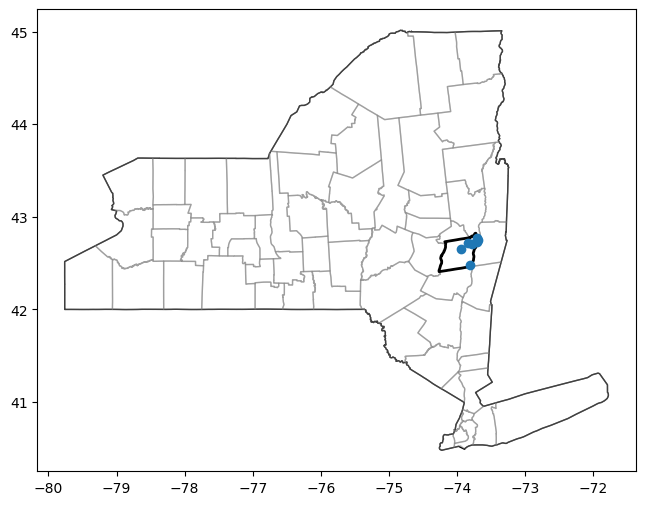

In [129]:
fig, ax = plt.subplots(figsize = (14,6))
state_border.plot(ax=ax,facecolor ='none',edgecolor ='black')
state_geo.plot(ax=ax,facecolor ='none',edgecolor ='gray',alpha = 0.5)
county_polygon.plot(ax=ax,facecolor ='none',edgecolor ='black',linewidth = 2)
ax.scatter(county_facilities['Longitude'],county_facilities['Latitude'])


In [133]:
print(county_facilities['Population Served'].sum())
# county_facilities


215521


In [134]:
# state_geo.head(10)

In [141]:
# This dataset was taken from the SDWIS report file for the state of NY
ny_facilities = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\testing_sdwis_dataset\sdwis_cws_ny.csv')
# This dataset was taken from SDWIS site at the county level for Albany
ny_albany_facilities =  pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\testing_sdwis_dataset\sdwis_cws_ny_albany.csv')

In [143]:
ny_facilities_no_duplicates = ny_facilities.drop_duplicates('PWS ID')
ny_facilities_no_duplicates.head(2)

,PWS ID,PWS Name,Facility Id,Facility Name,EPA Region,Primacy Agency,Facility Type Description,Is Source Ind,Activity Status,Deactivation Date,...,Water Type Description,Availability Description,PWS Type,Owner Type,Primary Source,Primacy Type,Season Begin Date,Season End Date,Population Served Count,Service Connections Count
0,NY0100189,ALBANY CITY,29766,ALCOVE RESERVOIR,Region 2,New York,Intake,Y,Active,NaN,...,Surface water,Permanent,Community water system,Local government,Surface water,State,NaN,NaN,997,13
21,NY0100190,"ALTAMONT, VILLAGE",72626,BRANDLE WELLS 1 & 2,Region 2,New York,Well,Y,Active,NaN,...,Ground water,Permanent,Community water system,Local government,Ground water,State,NaN,NaN,3600,1


In [142]:
ny_albany_facilities.head(2)

,Water System Name,County(s) Served,City(s) Served,Population Served,Primary Water Source Type,PWS Activity,Water System ID
0,ALBANY CITY,Albany,ALBANY (C),98000,SW,A,NY0100189
1,"ALTAMONT, VILLAGE",Albany,ALTAMONT (V),2000,GW,A,NY0100190


In [147]:
dpc_2020_no_duplicates_state.head(2)

,wsa_agidf,year,population,lat,lon,dpc_0,dpc_1,dpc_2,dpc_3,dpc_4,...,dpc_90,dpc_91,dpc_92,dpc_93,dpc_94,dpc_95,dpc_96,dpc_97,dpc_98,dpc_99
10017,ny1302759,2000,772.0,41.849471,-73.553876,95.33913,85.539566,88.09336,100.230896,84.239150,...,98.457910,91.72472,94.00273,95.91784,93.19470,102.014465,94.172050,89.393776,94.322945,94.127570
10038,ny1302761,2000,1282.0,41.739525,-73.573443,80.51011,76.551895,88.25579,77.660040,83.681526,...,86.612076,87.53276,83.36308,85.31692,85.46195,80.951310,89.580505,87.907830,76.476840,85.993454


In [191]:
# Adding latitude and longitude data to the Albany dataset
latitude = []
longitude = []
state_report_check = []
baseline_data_check = []
usgs_data_check = []
for idx, row in ny_albany_facilities.iterrows():
    try:
        lat = dpc_2020_no_duplicates_state.loc[dpc_2020_no_duplicates_state['wsa_agidf']==row['Water System ID'].lower()]['lat'].values[0]
        long = dpc_2020_no_duplicates_state.loc[dpc_2020_no_duplicates_state['wsa_agidf']==row['Water System ID'].lower()]['lon'].values[0]
        usgs_data_check.append(1)
    except IndexError:
        lat = 0
        long = 0
        usgs_data_check.append(0)
    latitude.append(lat)
    longitude.append(long)
    # Check if the county wise is in state report and in baseline dataset
    if row['Water System ID'] in ny_facilities_no_duplicates['PWS ID'].values:
        state_report_check.append(1)
    else:
        state_report_check.append(0)

    if row['Water System ID'] in wt_baseline_state['PWS ID'].values:
        baseline_data_check.append(1)
    else:
        baseline_data_check.append(0)


ny_albany_facilities['Latitude'] = latitude
ny_albany_facilities['Longitude'] = longitude
ny_albany_facilities['state_report_check'] = state_report_check
ny_albany_facilities['baseline_data_check'] = baseline_data_check
ny_albany_facilities['usgs_data_check'] = usgs_data_check

ny_albany_facilities

# non_zero = ny_albany_facilities.loc[ny_albany_facilities['Latitude']!=0]

# print('With location data from the USGS set',non_zero['Population Served'].sum())
# print('From the SDWIS county wise set',ny_albany_facilities['Population Served'].sum())

,Water System Name,County(s) Served,City(s) Served,Population Served,Primary Water Source Type,PWS Activity,Water System ID,Latitude,Longitude,state_report_check,baseline_data_check,usgs_data_check
0,ALBANY CITY,Albany,ALBANY (C),98000,SW,A,NY0100189,42.703090,-73.777933,1,1,1
1,"ALTAMONT, VILLAGE",Albany,ALTAMONT (V),2000,GW,A,NY0100190,42.704984,-74.033967,1,0,1
2,BETHLEHEM WD NO 1,Albany,BETHLEHEM (T),31000,SW,A,NY0100191,0.000000,0.000000,1,1,0
3,COHOES CITY,Albany,COHOES (C),16883,SW,A,NY0100192,42.774693,-73.705498,1,1,1
4,SOUTH ALBANY WATER DISTRICT,Albany,BETHLEHEM (T),80,GW,A,NY0100193,0.000000,0.000000,1,1,0
5,COLONIE VILLAGE,Albany,COLONIE (V),8030,SWP,A,NY0100194,0.000000,0.000000,1,0,0
6,GREEN ISLAND VILLAGE,Albany,GREEN ISLAND (X),2900,SWP,A,NY0100195,42.747409,-73.692570,1,1,1
7,LATHAM WATER DISTRICT,Albany,COLONIE (T),85590,SW,A,NY0100198,42.719918,-73.833380,1,1,1
8,MENANDS VILLAGE,Albany,MENANDS (V),4500,SWP,A,NY0100200,0.000000,0.000000,1,1,0
9,RAVENA VILLAGE,Albany,RAVENA (V),4500,SW,A,NY0100201,42.475581,-73.811309,1,1,1


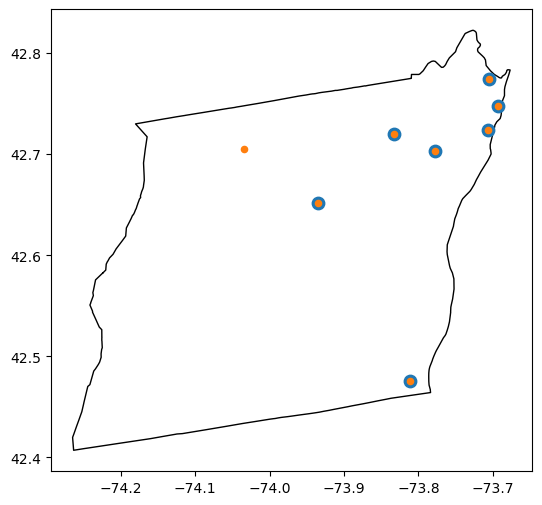

In [184]:
fig, ax = plt.subplots(figsize = (14,6))
# state_border.plot(ax=ax,facecolor ='none',edgecolor ='black')
# state_geo.plot(ax=ax,facecolor ='none',edgecolor ='gray',alpha = 0.5)
county_polygon.plot(ax=ax,facecolor ='none',edgecolor ='black')
ax.scatter(county_facilities['Longitude'],county_facilities['Latitude'],s=80)
ax.scatter(non_zero['Longitude'],non_zero['Latitude'] ,s =20)